In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'Mall_Customers.csv',index_col=0,header=0)

In [3]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
print(df.shape)
print(df.info())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None


In [5]:
print(df.describe(include='all'))
df.isnull().sum()

        Gender         Age  Annual Income (k$)  Spending Score (1-100)
count      200  200.000000          200.000000              200.000000
unique       2         NaN                 NaN                     NaN
top     Female         NaN                 NaN                     NaN
freq       112         NaN                 NaN                     NaN
mean       NaN   38.850000           60.560000               50.200000
std        NaN   13.969007           26.264721               25.823522
min        NaN   18.000000           15.000000                1.000000
25%        NaN   28.750000           41.500000               34.750000
50%        NaN   36.000000           61.500000               50.000000
75%        NaN   49.000000           78.000000               73.000000
max        NaN   70.000000          137.000000               99.000000


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:xlabel='Annual Income (k$)'>

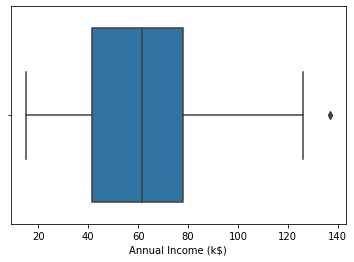

In [6]:
sns.boxplot(df['Annual Income (k$)'])

In [7]:
X = df.values[:,[2,3]]

In [8]:
X

array([[15, 39],
       [15, 81],
       [16, 6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18, 6],
       [18, 94],
       [19, 3],
       [19, 72],
       [19, 14],
       [19, 99],
       [20, 15],
       [20, 77],
       [20, 13],
       [20, 79],
       [21, 35],
       [21, 66],
       [23, 29],
       [23, 98],
       [24, 35],
       [24, 73],
       [25, 5],
       [25, 73],
       [28, 14],
       [28, 82],
       [28, 32],
       [28, 61],
       [29, 31],
       [29, 87],
       [30, 4],
       [30, 73],
       [33, 4],
       [33, 92],
       [33, 14],
       [33, 81],
       [34, 17],
       [34, 73],
       [37, 26],
       [37, 75],
       [38, 35],
       [38, 92],
       [39, 36],
       [39, 61],
       [39, 28],
       [39, 65],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51],
   

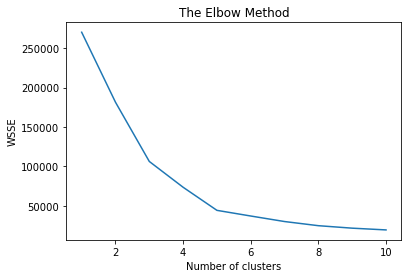

In [9]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
 
wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse)
#plt.scatter(range(1, 11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [10]:
print(wsse)

[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37271.88623658949, 30273.394312070042, 25022.485004530354, 21881.878507060967, 19669.71099830122]


In [11]:
# Fitting the K-means to the dataset
kmeans = KMeans(n_clusters = 5, random_state = 10)
Y_pred = kmeans.fit_predict(X)

#kmeans.fit(X)-->training
#Y_pred=kmeans.predict(X)-->predicting

In [12]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [13]:
kmeans.inertia_

44448.45544793371

In [14]:
kmeans.n_iter_

5

In [15]:
df['Clusters']=Y_pred
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3


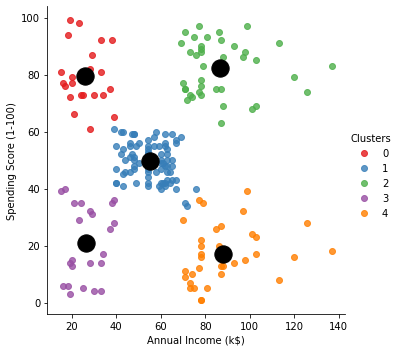

In [16]:
sns.lmplot( data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
           fit_reg=False, # No regression line
           hue='Clusters',palette="Set1")  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black')
plt.show()



In [17]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [18]:
df['Clusters']=df.Clusters.replace({0:'Careless',1:'Standard',2:'Target',3:'Sensible',4:'Careful'})

In [19]:
#pd.set_option('display.max_rows',None)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Sensible
2,Male,21,15,81,Careless
3,Female,20,16,6,Sensible
4,Female,23,16,77,Careless
5,Female,31,17,40,Sensible


In [20]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [21]:
df.Clusters.value_counts()

Standard    81
Target      39
Careful     35
Sensible    23
Careless    22
Name: Clusters, dtype: int64

In [22]:
new_df = df[df['Clusters']=='Target']

In [23]:
new_df.shape

(39, 5)

In [24]:
# Fitting the K-means to the dataset
kmeans = KMeans(n_clusters = 6, random_state = 10)
Y_pred = kmeans.fit_predict(X)

#kmeans.fit(X)-->training
#Y_pred=kmeans.predict(X)-->predicting

In [25]:
df['Clusters']=Y_pred
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,4
3,Female,20,16,6,2
4,Female,23,16,77,4
5,Female,31,17,40,2


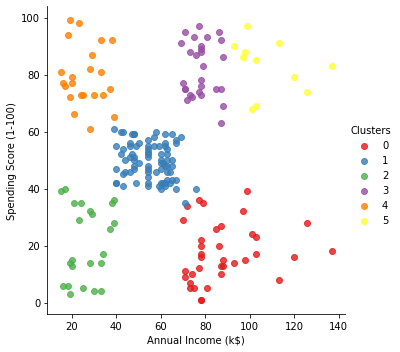

In [26]:
sns.lmplot( data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
           fit_reg=False, # No regression line
           hue='Clusters',palette="Set1")  
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black')
plt.show()

